# 축구데이터 - 3. EPL 20/21 시즌 의적팀

In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
#20 / 21 EPL EZ_Point - Kor
import pandas as pd

df = pd.DataFrame({'Team_Name':["맨시티", "맨유","리버풀","첼시","레스터","웨스트햄",
                                "토트넘","아스널","리즈","에버튼","아스톤빌라","뉴캐슬"
                                ,"울버햄튼","크팰","소튼","브라이튼","번리","풀럼",
                                "웨스트브롬","셰필드"],
                   'EZ_Point':[150.32,160.11,200.78,186.36,228,133.44,136.12,167.56
                               ,164.32,249.84,217.01,163.59,195.97,128.75,111.34,
                               207.32,158.23,140.34,135.21,105.55],
                   'EZ_Times':[11,17,17,19,22,18,17,18,18,25,23,19,24,16,15,26,
                               18,21,15,7],
                   'Rank':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
                  })

df["EZ_rate"] = df['EZ_Point'] / df['EZ_Times']
df

,Team_Name,EZ_Point,EZ_Times,Rank,EZ_rate
0,맨시티,150.32,11,1,13.665455
1,맨유,160.11,17,2,9.418235
2,리버풀,200.78,17,3,11.810588
3,첼시,186.36,19,4,9.808421
4,레스터,228.00,22,5,10.363636
5,웨스트햄,133.44,18,6,7.413333
6,토트넘,136.12,17,7,8.007059
7,아스널,167.56,18,8,9.308889
8,리즈,164.32,18,9,9.128889
9,에버튼,249.84,25,10,9.993600


### EPL 20/21 시즌의 배당 정보와 각팀의 경기별 승,무,패 기록을 가지고 데이터 프레임 작성
* EZ_Point = 의적질 발생시 -> ( 해당 배당 * 획득 승점 ) 을 통해 해당 행위로 얻은 점수를 수치화 함
* ex) 2.7 / 3.5 / 1.8 이라는 승,무,패 배당이 존재할 시 2.7의 배당으로 승리 했다면 2.7 * 3 으로 8.1의 포인트를 얻음
* ex) 1.7 / 3.5 / 7.5 이라는 승,무,패 배당이 존재할 시 3.5의 배당으로 무승부라면 3.5 * 1 로 3.5의 포인트를 얻음
* 이를 통해 같은 의적질이라도 포인트를 통해 구분할 수 있도록 함
* EZ_Times = 배당 상 지는 팀에게 이기거나 무승부 경우 / 배당 상 이겨야 하는 팀에게 지거나 무승부 경우 -> 횟수를 기록
* EZ_rate = Point / Times -> 한번 발생할 떄 어느정도의 포인트를 얻는지 비율 확인

---

In [3]:
df_sort_by_point = df.sort_values(by=['EZ_Point'], axis=0, ascending=False)
df_sort_by_point

,Team_Name,EZ_Point,EZ_Times,Rank,EZ_rate
9,에버튼,249.84,25,10,9.993600
4,레스터,228.00,22,5,10.363636
10,아스톤빌라,217.01,23,11,9.435217
15,브라이튼,207.32,26,16,7.973846
2,리버풀,200.78,17,3,11.810588
12,울버햄튼,195.97,24,13,8.165417
3,첼시,186.36,19,4,9.808421
7,아스널,167.56,18,8,9.308889
8,리즈,164.32,18,9,9.128889
11,뉴캐슬,163.59,19,12,8.610000


### EPL 20/21 시즌 EZ_Point 별 정렬
* 에버튼 , 레스터 , 아스톤 빌라가 비교적 EZ_Point 가 높은 팀이다.
* 크리스탈 팰리스 , 사우스햄튼 , 셰필드가 EZ_Point 가 낮은 팀이다.
* 4위는 브라이튼 이다. 브라이튼은 지난 축구데이터 1번 글에서 경기 승패가 순위에 좌우되지 않는 팀 순위중 1등이었다.
* 경기가 순위에 따라 좌우되지 않았었고 , EZ_Point 면에서도 point가 높게 나오는 것을 볼 수 있다.

---

In [4]:
df_sort_by_times = df.sort_values(by=['EZ_Times'], axis=0, ascending=False)
df_sort_by_times

,Team_Name,EZ_Point,EZ_Times,Rank,EZ_rate
15,브라이튼,207.32,26,16,7.973846
9,에버튼,249.84,25,10,9.993600
12,울버햄튼,195.97,24,13,8.165417
10,아스톤빌라,217.01,23,11,9.435217
4,레스터,228.00,22,5,10.363636
17,풀럼,140.34,21,18,6.682857
11,뉴캐슬,163.59,19,12,8.610000
3,첼시,186.36,19,4,9.808421
5,웨스트햄,133.44,18,6,7.413333
7,아스널,167.56,18,8,9.308889


### EPL 20/21 시즌 EZ_Times 별 정렬

#### EPL 20/21 시즌 EZ_Times 별 정렬 -> 상위팀
* 의적질이 가장 많이 발생한 팀은 브라이튼 , 에버튼 , 울버햄튼 이다.
* 전체 38경기중 26 ~ 24 번으로 절반 이상으로 발생하였다.
* 이는 본인 팀보다 강한 팀들도 많이 이겼지만 , 본인 팀보다 약한 팀에게도 많이 졌다는 것을 의미한다.

#### EPL 20/21 시즌 EZ_Times 별 정렬 -> 하위팀
* 의적질이 가장 적었던 팀들은 사우스햄튼 , 맨시티 , 셰필드 이다.
* 전체 38경기중 15 ~ 7 번으로 매우 적은 수로 발생하였다.
* 맨시티와 , 셰필드의 경우 EPL 20/21 시즌 독보적인 1등과 20등 이었기에 발생 횟수가 적다.
* 이는 본인 팀보다 강한팀에게는 많이 졌고 , 본인 팀보다 약한 팀에게는 많이 이겼다는 것을 의미한다.

---

In [5]:
df_sort_by_rate = df.sort_values(by=["EZ_rate"], axis=0, ascending=False)
df_sort_by_rate

,Team_Name,EZ_Point,EZ_Times,Rank,EZ_rate
19,셰필드,105.55,7,20,15.078571
0,맨시티,150.32,11,1,13.665455
2,리버풀,200.78,17,3,11.810588
4,레스터,228.00,22,5,10.363636
9,에버튼,249.84,25,10,9.993600
3,첼시,186.36,19,4,9.808421
10,아스톤빌라,217.01,23,11,9.435217
1,맨유,160.11,17,2,9.418235
7,아스널,167.56,18,8,9.308889
8,리즈,164.32,18,9,9.128889


### EPL 20/21 시즌 EZ_rate 별 정렬
* EZ_rate가 높은 팀은 셰필드 , 맨시티 , 리버풀 이다.
* 맨시티 , 셰필드의 경우 압도적 1, 20등 이었기에 당연히 이기거나 진다고 생각한 고배당의 경기를 지거나 이겼기에 rate가 높다.
* EZ_rate가 낮은 팀은 사우스햄튼, 웨스트햄 , 풀럼 이다.
* 이 팀들은 본인들과 근소한 차이에 있는 팀들끼리의 대결에서 저배당의 경기를 내주거나 , 따냈기에 rate가 낮다.

---

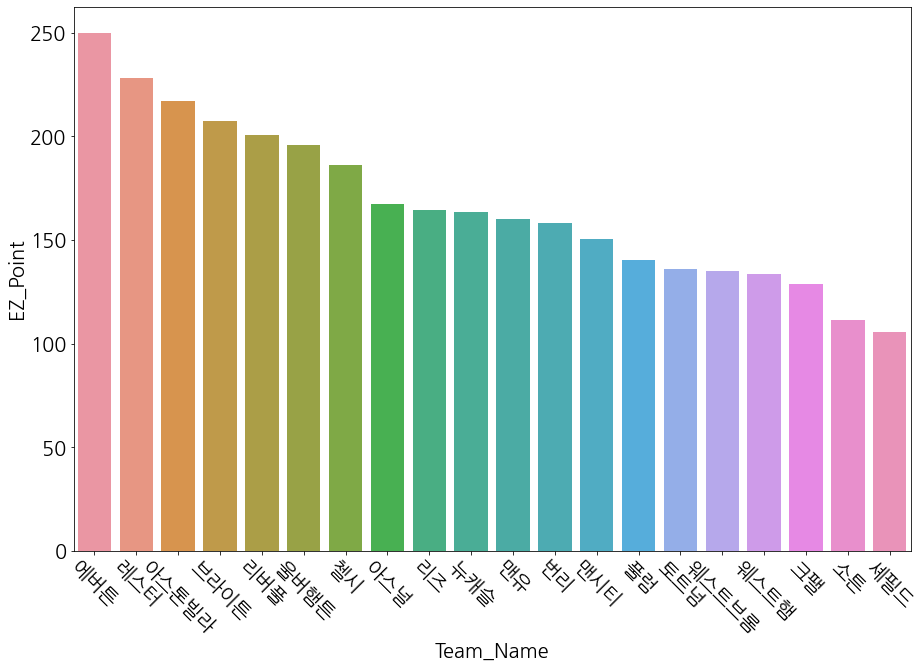

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [15, 10]
plt.xticks(rotation = -45)
sns.barplot(data=df_sort_by_point, x="Team_Name", y="EZ_Point")
plt.show()

### EZ_Point 시각화
* 내용은 위의 표와 같다. 

---

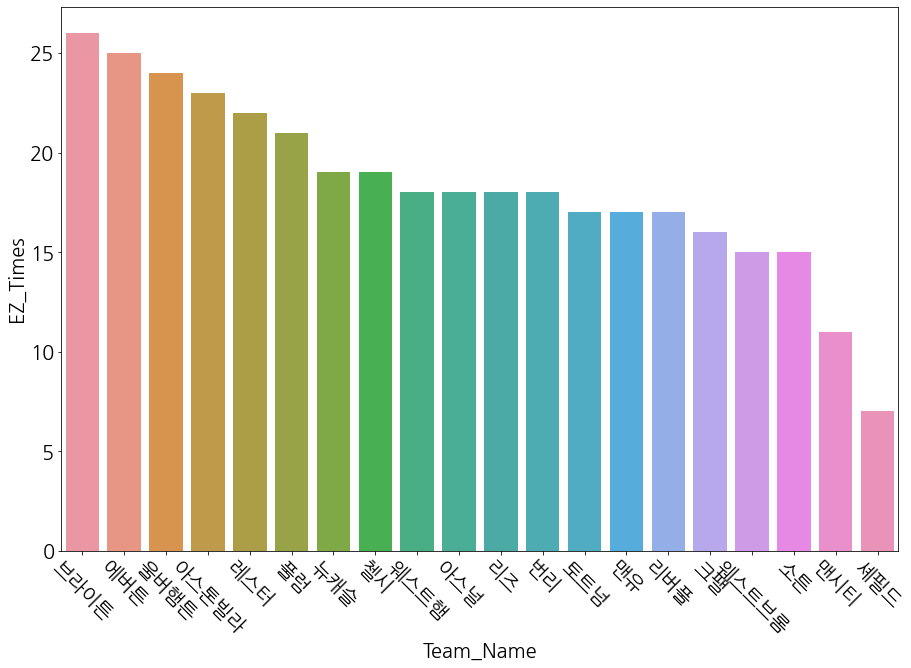

In [12]:
plt.xticks(rotation = -45)
sns.barplot(data=df_sort_by_times, x="Team_Name", y="EZ_Times")
plt.show()

### EZ_Times 시각화
* 내용은 위의 표와 같다.

---

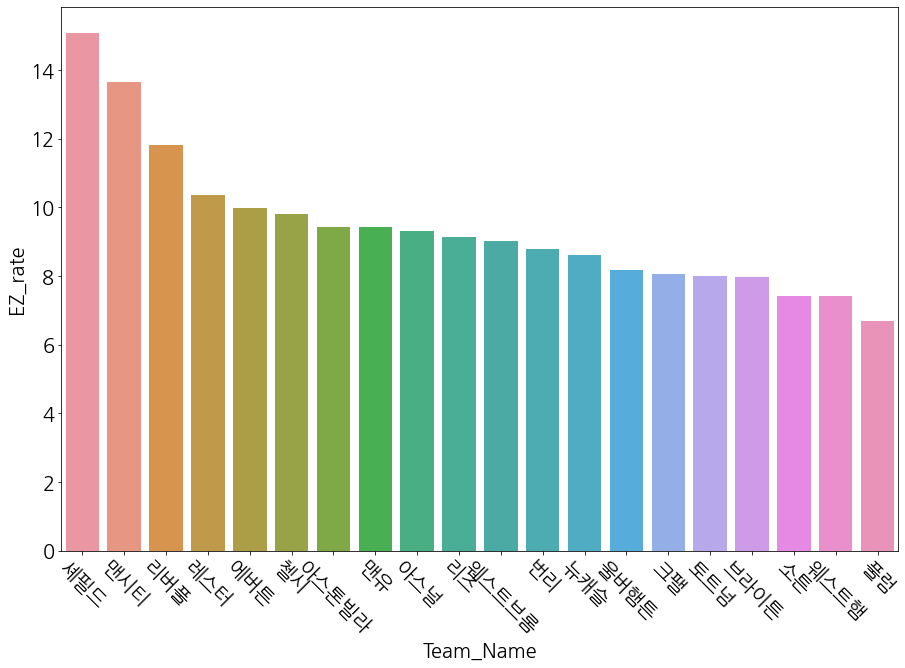

In [13]:
plt.xticks(rotation = -45)
sns.barplot(data=df_sort_by_rate, x="Team_Name", y="EZ_rate")
plt.show()

### EZ_rate 시각화
* 내용은 위의 표와 같다.

---

In [14]:
df.mean()

EZ_Point    167.008000
EZ_Times     18.300000
Rank         10.500000
EZ_rate       9.406906
dtype: float64

### Point , Times , rate 의 평균
* EZ_Point의 평균은 167.008000
* EZ_Times의 평균은 18.300000
* EZ_rate의 평균은 9.406906

---

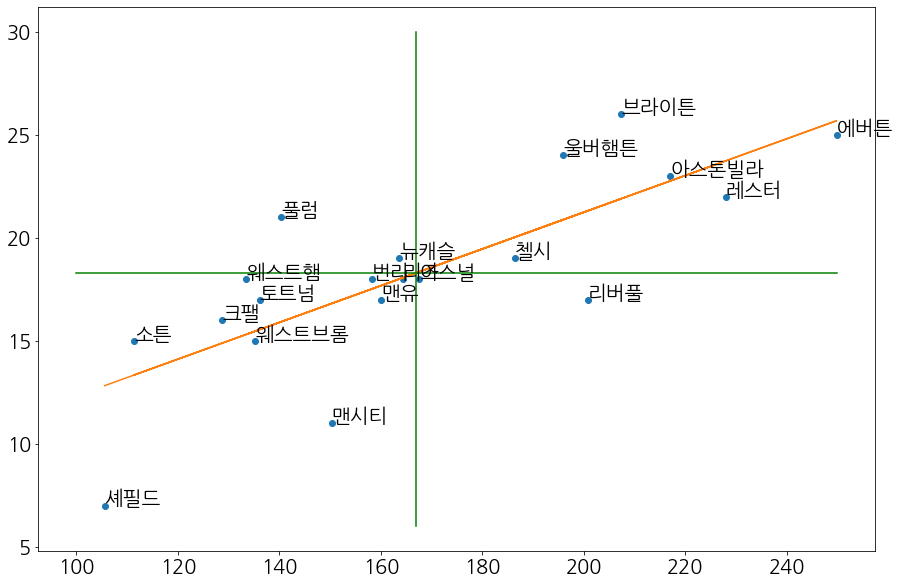

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df["EZ_Point"]
y = df["EZ_Times"]

line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.plot([167, 167], [6, 30],color="green") # x1 x2 , y1 y2 선긋기
plt.plot([100, 250], [18.3, 18.3],color="green")

for i in df["Team_Name"]:
    plt.text(df.EZ_Point[df.Team_Name==i],df.EZ_Times[df.Team_Name==i],i,color='black')

plt.show()

### 그래프를 통해 확인하는 EPL 20/21 팀별 현황
* 의적질 이란 자신 보다 강한 팀에게 이겨 승점을 따오고 , 약한 팀에게 패배해 승점을 나누어 주는 행위
* 다시말해 , 의적질 이라는 행위를 통해 팀의 성적에 있어 기복이 있느냐 없느냐 를 이야기 할 수 있음

#### linear regression 으로 보는 경향 확인
* 오렌지색 선이 linear regression을 통해 추정한 Point와 times 사이의 관계이다.
* 초록색 선은 해당 point 와 times의 평균 이다.
* 대부분의 팀들이 times가 오를 수록 point 도 오르는 우상향하는 모습을 보이고 있다.
* times 즉 발생횟수가 늘어날 수록 point가 늘어나는 것은 어떻게 보면 당연한 일이다.
* 오렌지색 선보다 아래 있다면 추정치 보다 point를 많이 땀 -> 배당이 작은경기를 내주거나 따냄 
* 오렌지색 선보다 위에 있다면 추정치 보다 point를 적게 땀 -> 배당이 큰경기를 내주거나 따냄 

#### times 와 point의 평균으로 구분된 사분면
* 1사분면 -> time - high / point - high / 자신보다 많이 강한팀도 잡지만 많이 약한팀한테도 잡히는 모습 기복이 있음 일관성 x
* 2사분면 -> time - high / point - low / 자신보다 한끝 전후 차이의 팀들에게 기복있는 모습 실력차가 많이 날 수록 일관적
* 3사분면 -> time - low / point - low / 자신보다 약하면 잡아주고 강하면 다 져주는 아주 일관적 강팀은 승리 , 약팀은 패배
* 4사분면 -> time - low / point - high / 일관적인 모습을 보여주지만 큰 경기를 잡아내거나 먹히거나 큰 한방이 있음

### 1사분면과 3사분면의 기복이 큰팀과 작은팀 실제 경기기록 비교
#### 빅7 -> 맨시티 , 맨유 , 리버풀 , 첼시 , 레스터 , 토트넘 , 아스널 
#### 하위 5팀 (최종 16 ~ 20위 )  -> 브라이튼 , 번리 , 풀럼 , 웨스트 브로미치 , 셰필드

* 가장 기복이 없어보이는 사우스햄튼의 경우 빅7 상대로 1승 4무 9패 / 하위권 5팀 상대로 7승 1무 2패 -> 기복이 매우 없음
* 가장 기복 있어보이는 에버튼의 경우 빅7 상대로 6승 4무 4패 / 하위권 5팀 상대로 5승 2무 3패 -> 사우스햄튼 보다 하위권을 더 못잡음
* 브라이튼 -> 6승4무10패 ( 최종 1 ~ 10위와의 대결 ) / 하위권 4팀 상대로 6무2패 -> 기복이 굉장히 크게 나옴